In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches


In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
#import datetime library 
import datetime as dt
from dateutil.relativedelta import relativedelta

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# last_date = engine.execute('SELECT MAX(date) FROM measurement LIMIT 10').fetchall()
# last_date
# Calculate the date 1 year ago from the last data point in the database
#last_12 = session.query(Measurement.date, (Measurement.prcp))\.filter(Measurement.date > '2016-08-23')
last_12 = dt.date(2017, 8, 23) - dt.timedelta(days=365)

   
# Perform a query to retrieve the date and precipitation scores

prcp_measurement = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_12).order_by(Measurement.date).all()
prcp_measurement
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df_last_12 = pd.DataFrame(prcp_measurement, columns=['date', 'precpitation'])
prcp_df_last_12.set_index(prcp_df_last_12['date'], inplace=True)


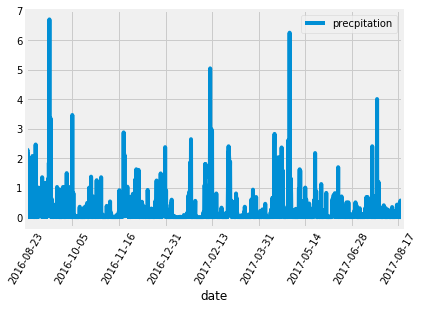

In [12]:
# Sort the dataframe by date
prcp_df_last_12_clean = prcp_df_last_12.dropna()
prcp_df_last_12_clean
# Use Pandas Plotting with Matplotlib to plot the data
#added dropna to clean it because the plot was a mess 
prcp_df_last_12_clean.plot()
plt.xticks(rotation=60)
plt.show()

![precipitation](Images/precipitation.png)

In [13]:
#just sayin, the example doesn't have a date... seems... incomplete

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df_last_12_clean.describe()

,precpitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [15]:
# Design a query to show how many stations are available in this dataset?
#wow another poorly worded question, go trilogy 
#why does unique not work
stations_in_data=session.query(Measurement.station).group_by(Measurement.station).count()
stations_in_data


9

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
count_active_stations=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station). \
order_by(func.count(Measurement.station).desc()).all()
count_active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
top_station = pd.DataFrame(count_active_stations, columns=['station', 'tobs'])
station_name_best=top_station['station'].iloc[0]
station_name_best

'USC00519281'

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
#why is there a question mark, this isn't a question
top = session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == Station.station).filter(Measurement.station == station_name_best).all()

print(f"The best station is: {station_name_best} and this is it's Highest temp, Lowest temp, Avg temp")
print(f"{top}")


The best station is: USC00519281 and this is it's Highest temp, Lowest temp, Avg temp
[(85.0, 54.0, 71.66378066378067)]


In [19]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_hist = session.query(Measurement.station, Measurement.date, Measurement.tobs).group_by(Measurement.date).\
    filter(Measurement.date <= '2017-8-23').filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.station=="USC00519281").all()
last_12_hist

[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

In [20]:
last_12_hist_df = pd.DataFrame(last_12_hist, columns=["station", "date", "tobs"])
indexed_last_12_hist = last_12_hist_df.set_index('date')
indexed_last_12_hist.head()

,station,tobs
date,,
2016-08-23,USC00519281,77.0
2016-08-24,USC00519281,77.0
2016-08-25,USC00519281,80.0
2016-08-26,USC00519281,80.0
2016-08-27,USC00519281,75.0


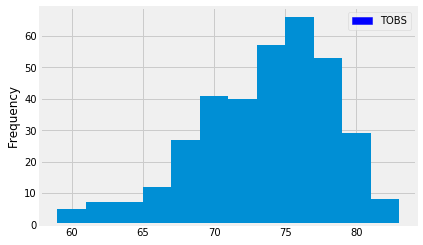

In [21]:
#plot the results as a histogram n_bins = 12 for yrs 
x = indexed_last_12_hist['tobs']
n_bins = 12
plot=plt.hist(x, n_bins)
plt.ylabel('Frequency')
red_patch = mpatches.Patch(color='blue', label='TOBS')
plt.legend(handles=[red_patch])
#plt.ylim(0, 60)
#i set y lim but didnt like
plt.show()

![precipitation](Images/station-histogram.png)

In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [23]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_dates = calc_temps("2016-08-23", "2017-08-23")
trip_dates

[(58.0, 74.59058295964125, 87.0)]

In [24]:
# Plot the results from your previous query as a bar chart. 
# Use the average temperature for the y value
trip_temp = pd.DataFrame(trip_dates, columns=['Min', 'Avg', 'Max'])
# Use the average temperature for the y value
average_temp = trip_temp['Avg']
# Use "Trip Avg Temp" as your Title
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
#used iloc so you dont end up with two numbers and float
tmax_tmin_temp = trip_temp['Max'] - trip_temp['Min']
tmax_tmin_temp


0    29.0
dtype: float64

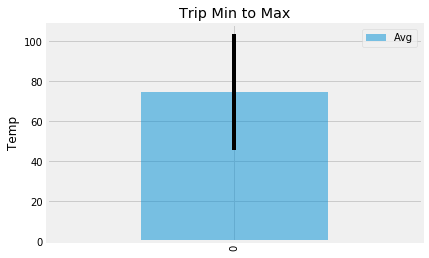

In [25]:
#do some plottin
average_temp.plot(kind = 'bar', yerr = tmax_tmin_temp, alpha=0.5)
plt.ylabel('Temp')
plt.legend()
plt.title('Trip Min to Max')
plt.show()

In [26]:

# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [27]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [28]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [29]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [30]:
# Plot the daily normals as an area plot with `stacked=False`
